<a href="https://colab.research.google.com/github/ArlikAA/folium_project_n3ts/blob/main/arlika%20zahra%20ginting_X.6_KotaKupangipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [12]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

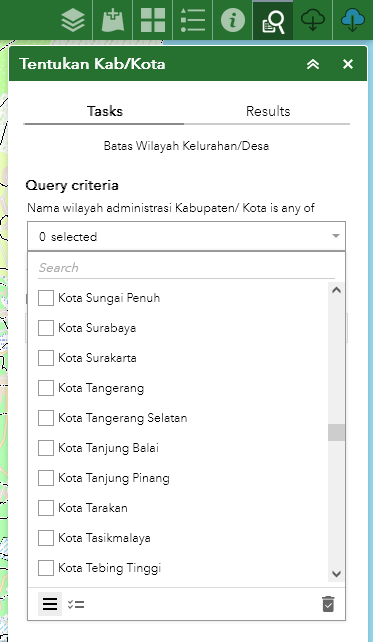

In [13]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Pontianak']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# CSV file path
csv_path = '/content/Data_Pontianak.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, header = 1,)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kecamatan'] = csv_data['Kecamatan'].str.lower().str.replace(' ', '')
admin_gdf['WADMKC'] = admin_gdf['WADMKC'].str.lower().str.replace(' ', '')
#csv_data['Jumlah_KK'] = csv_data['Jumlah_KK'].astype(str).str.replace('.', '')
#csv_data['Jumlah_KK'] = pd.to_numeric(csv_data['Jumlah_KK'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='WADMKC', right_on='Kecamatan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

            Kecamatan  Jumlah KK
0   Pontianak Selatan      91290
1  Pontianak Tenggara      49176
2     Pontianak Timur     110904
3     Pontianak Barat     150517
4      Pontianak Kota     123867
       OBJECTID                NAMOBJ       FCODE REMARK  \
47319   47320.0                Akcaya  BA03070040   None   
47450   47451.0  Bangkabelitung Darat  BA03070040   None   
47451   47452.0   Bangkabelitung Laut  BA03070040   None   
47470   47471.0        Banjar Serasan  BA03070040   None   
47471   47472.0          Bansir Darat  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
47319  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47450  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47451  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47470  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
47471  TASWIL1000020230928_DATA_BATAS_DES

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
# Create a base map
m = folium.Map(location=[-0.024065152484102657, 109.33394807380947], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kecamatan", "Jumlah KK"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','Jumlah KK'],
        aliases=['Kecamatan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [19]:
# Create a base map
m = folium.Map(location=[-0.024065152484102657, 109.33394807380947], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="choropleth",
    data=merged_gdf,
    columns=["Kecamatan", "Jumlah KK"],
    key_on= "feature.properties.WADMKC",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMAN _Pontianak.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Kota Pontianak")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['name']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKC','Jumlah KK'],
        aliases=['Kecamatan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kecamatan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab:Pontianak Barat

Kecamatan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:Pontianaktenggara